In [1]:
import pandas as pd

# load Excel file
df = pd.read_excel("../data_raw/credit_card_default.xls")

df.head()


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [2]:
df.shape


(30001, 25)

In [3]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [4]:
df['Y'].value_counts(normalize=True)

Y
0                             0.778774
1                             0.221193
default payment next month    0.000033
Name: proportion, dtype: float64

In [5]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

df = df.rename(columns={
    'X1': 'limit_bal',
    'X2': 'sex',
    'X3': 'education',
    'X4': 'marriage',
    'X5': 'age',
    'X6': 'pay_0',
    'X7': 'pay_2',
    'X8': 'pay_3',
    'X9': 'pay_4',
    'X10': 'pay_5',
    'X11': 'pay_6',
    'X12': 'bill_amt1',
    'X13': 'bill_amt2',
    'X14': 'bill_amt3',
    'X15': 'bill_amt4',
    'X16': 'bill_amt5',
    'X17': 'bill_amt6',
    'X18': 'pay_amt1',
    'X19': 'pay_amt2',
    'X20': 'pay_amt3',
    'X21': 'pay_amt4',
    'X22': 'pay_amt5',
    'X23': 'pay_amt6',
    'Y': 'default'
})


In [6]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [7]:
df['default'].value_counts(normalize=True)


default
0                             0.778774
1                             0.221193
default payment next month    0.000033
Name: proportion, dtype: float64

In [8]:
df[df['default'].astype(str).str.contains('default', case=False, na=False)]


,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [9]:
df = df[df['default'].isin([0, 1])]


In [10]:
df['default'] = df['default'].astype(int)


In [11]:
df['default'].value_counts(normalize=True)


default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [12]:
df['default'].value_counts()


default
0    23364
1     6636
Name: count, dtype: int64

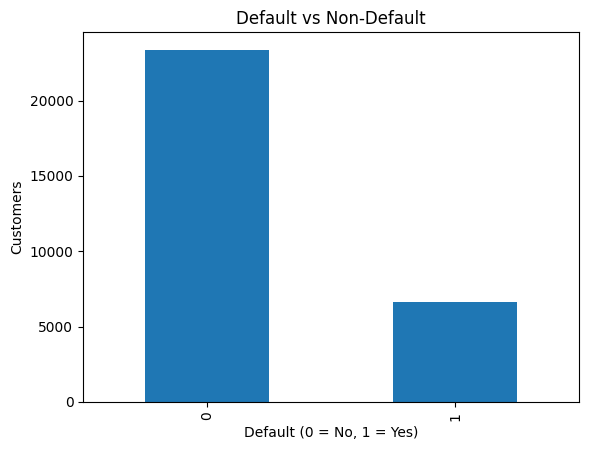

In [13]:
import matplotlib.pyplot as plt

df['default'].value_counts().plot(kind='bar')
plt.title('Default vs Non-Default')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Customers')
plt.show()


In [14]:
df.groupby('default')['limit_bal'].mean()


default
0    178099.726074
1     130109.65642
Name: limit_bal, dtype: object

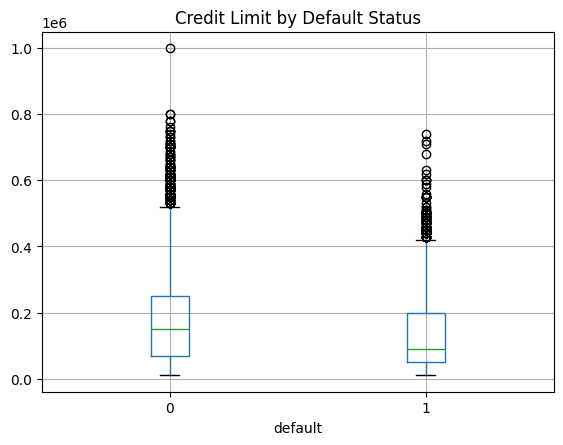

In [15]:
df.boxplot(column='limit_bal', by='default')
plt.title('Credit Limit by Default Status')
plt.suptitle('')
plt.show()


In [16]:
pay_cols = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']

df.groupby('default')[pay_cols].mean()


,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
default,,,,,,
0,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624
1,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116


In [17]:
bill_cols = ['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6']

df.groupby('default')[bill_cols].mean()


,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
default,,,,,,
0,51994.227273,49717.43567,47533.365605,43611.165254,40530.445343,39042.268704
1,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503


In [18]:
pay_amt_cols = ['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']

df.groupby('default')[pay_amt_cols].mean()


,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
default,,,,,,
0,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [19]:
df.groupby('default')['age'].mean()


default
0    35.417266
1    35.725738
Name: age, dtype: object

In [20]:
df.groupby('default')['education'].value_counts(normalize=True)


default  education
0        2            0.457970
         1            0.365905
         3            0.157507
         5            0.011214
         4            0.004965
         6            0.001840
         0            0.000599
1        2            0.501808
         1            0.306811
         3            0.186407
         5            0.002712
         6            0.001206
         4            0.001055
Name: proportion, dtype: float64

In [21]:
df.groupby('default')['marriage'].value_counts(normalize=True)


default  marriage
0        2           0.540276
         1           0.447398
         3           0.010229
         0           0.002097
1        2           0.503466
         1           0.483122
         3           0.012658
         0           0.000753
Name: proportion, dtype: float64

In [22]:
corr = df[['default','limit_bal','age','pay_0','bill_amt1','pay_amt1']].corr()
corr


,default,limit_bal,age,pay_0,bill_amt1,pay_amt1
default,1.000000,-0.153520,0.013890,0.324794,-0.019644,-0.072929
limit_bal,-0.153520,1.000000,0.144713,-0.271214,0.285430,0.195236
age,0.013890,0.144713,1.000000,-0.039447,0.056239,0.026147
pay_0,0.324794,-0.271214,-0.039447,1.000000,0.187068,-0.079269
bill_amt1,-0.019644,0.285430,0.056239,0.187068,1.000000,0.140277
pay_amt1,-0.072929,0.195236,0.026147,-0.079269,0.140277,1.000000


In [23]:
df['education'].value_counts()
df['marriage'].value_counts()
df['sex'].value_counts()


sex
2    18112
1    11888
Name: count, dtype: int64

In [24]:
df['education'].value_counts()


education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [25]:
df['marriage'].value_counts()

marriage
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [26]:
# Define target
y = df['default']

# Drop target and raw ID columns
X = df.drop(columns=['default'])


In [27]:
X.shape, y.shape


((30000, 23), (30000,))

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [31]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


[[4528  145]
 [1009  318]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

ROC-AUC: 0.7076355036089734


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


[[3255 1418]
 [ 504  823]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000

ROC-AUC: 0.7081149369197677


In [35]:
import pandas as pd
import numpy as np

coefficients = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})

coefficients['abs_coef'] = np.abs(coefficients['coefficient'])

coefficients.sort_values(by='abs_coef', ascending=False).head(15)


,feature,coefficient,abs_coef
5,pay_0,0.590401,0.590401
11,bill_amt1,-0.285129,0.285129
17,pay_amt1,-0.184401,0.184401
18,pay_amt2,-0.161328,0.161328
0,limit_bal,-0.136720,0.136720
6,pay_2,0.101077,0.101077
2,education,-0.094227,0.094227
7,pay_3,0.090222,0.090222
4,age,0.079673,0.079673
12,bill_amt2,0.073675,0.073675


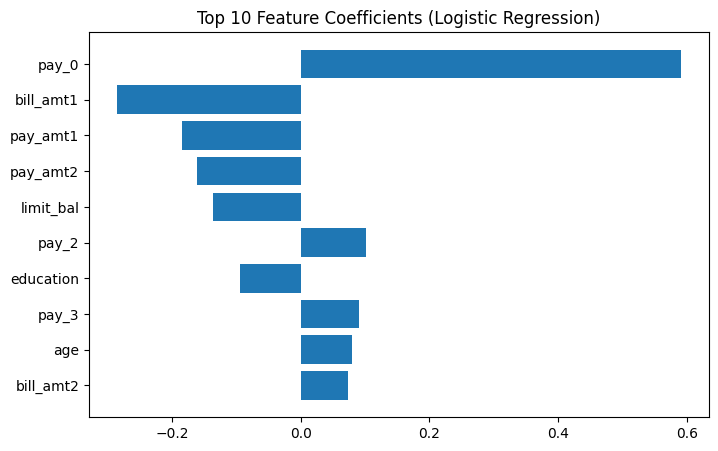

In [36]:
top10 = coefficients.sort_values(by='abs_coef', ascending=False).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(top10['feature'], top10['coefficient'])
plt.title("Top 10 Feature Coefficients (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [38]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]


In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


[[4428  245]
 [ 866  461]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000

ROC-AUC: 0.7563224159181535


In [40]:
import numpy as np

threshold = 0.35

y_pred_custom = (y_proba_rf >= threshold).astype(int)


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[4167  506]
 [ 683  644]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4673
           1       0.56      0.49      0.52      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.69      0.70      6000
weighted avg       0.79      0.80      0.80      6000



In [42]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from xgboost import XGBClassifier
print("XGBoost imported successfully")


XGBoost imported successfully


In [45]:
import pandas as pd

# 1) Make sure X is a DataFrame
X_train = pd.DataFrame(X_train).copy()
X_test  = pd.DataFrame(X_test).copy()

# 2) Strip spaces (common issue)
X_train.columns = X_train.columns.str.strip()
X_test.columns  = X_test.columns.str.strip()

# 3) Convert object columns to numeric (turns bad strings into NaN)
obj_cols = X_train.select_dtypes(include="object").columns
for c in obj_cols:
    X_train[c] = pd.to_numeric(X_train[c].astype(str).str.strip(), errors="coerce")
    X_test[c]  = pd.to_numeric(X_test[c].astype(str).str.strip(), errors="coerce")

# 4) Fill missing values (simple baseline)
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test  = X_test.fillna(X_train.median(numeric_only=True))

# Quick check
print(X_train.dtypes.head(20))
print("Any object left?", (X_train.dtypes == "object").any())


limit_bal    int64
sex          int64
education    int64
marriage     int64
age          int64
pay_0        int64
pay_2        int64
pay_3        int64
pay_4        int64
pay_5        int64
pay_6        int64
bill_amt1    int64
bill_amt2    int64
bill_amt3    int64
bill_amt4    int64
bill_amt5    int64
bill_amt6    int64
pay_amt1     int64
pay_amt2     int64
pay_amt3     int64
dtype: object
Any object left? False


In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [47]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
)

# Fit
xgb.fit(X_train, y_train)

# Predict
y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred  = (y_proba >= 0.5).astype(int)

print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Average Precision (PR AUC):", average_precision_score(y_test, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred, digits=4))


ROC AUC: 0.7761640690777447
Average Precision (PR AUC): 0.5505520841581292

Confusion Matrix:
 [[3762  911]
 [ 508  819]]

Report:
               precision    recall  f1-score   support

           0     0.8810    0.8051    0.8413      4673
           1     0.4734    0.6172    0.5358      1327

    accuracy                         0.7635      6000
   macro avg     0.6772    0.7111    0.6886      6000
weighted avg     0.7909    0.7635    0.7738      6000



In [48]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    xgb,
    X_train,
    y_train,
    scoring="roc_auc",
    cv=5
)

print("CV ROC AUC scores:", cv_scores)
print("Mean CV ROC AUC:", cv_scores.mean())


CV ROC AUC scores: [0.7853563  0.79592134 0.77044005 0.78453613 0.77977148]
Mean CV ROC AUC: 0.7832050583877223


In [49]:
import numpy as np
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print("Best threshold:", best_threshold)
print("Precision at best:", precision[best_idx])
print("Recall at best:", recall[best_idx])
print("F1 at best:", f1_scores[best_idx])


Best threshold: 0.5530862
Precision at best: 0.520471894517696
Recall at best: 0.5651846269781462
F1 at best: 0.5419075094593482


In [50]:
import pandas as pd

importance = pd.Series(
    xgb.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(importance.head(10))


pay_0        0.358434
pay_2        0.112803
pay_4        0.078954
pay_3        0.059695
pay_5        0.042878
pay_6        0.037218
limit_bal    0.027259
pay_amt2     0.026342
pay_amt1     0.022496
pay_amt3     0.022484
dtype: float32


In [56]:
eps = 1e-6

for i in range(1, 7):
    X_train[f'util_ratio_{i}'] = X_train[f'bill_amt{i}'] / (X_train['limit_bal'] + eps)
    X_test[f'util_ratio_{i}']  = X_test[f'bill_amt{i}']  / (X_test['limit_bal'] + eps)

In [58]:
for i in range(1, 7):
    X_train[f'pay_ratio_{i}'] = X_train[f'pay_amt{i}'] / (X_train[f'bill_amt{i}'].abs() + eps)
    X_test[f'pay_ratio_{i}']  = X_test[f'pay_amt{i}']  / (X_test[f'bill_amt{i}'].abs() + eps)


In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import numpy as np

# Final cleanup
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test  = X_test.fillna(X_train.median(numeric_only=True))

xgb = XGBClassifier(
    n_estimators=600,
    max_depth=3,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)

y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred  = (y_proba >= 0.5).astype(int)

print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ROC AUC: 0.779989214766288
[[3729  944]
 [ 499  828]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.53      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



In [60]:
train_proba = xgb.predict_proba(X_train)[:, 1]
print("Train ROC AUC:", roc_auc_score(y_train, train_proba))


Train ROC AUC: 0.8286261356750537


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

param_dist = {
    "n_estimators": [400, 600, 800],
    "max_depth": [2, 3, 4, 5],
    "learning_rate": [0.01, 0.03, 0.05],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.5, 1, 2]
}

xgb_base = XGBClassifier(
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42,
    eval_metric="logloss"
)

random_search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=20,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Params: {'subsample': 0.8, 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 2, 'colsample_bytree': 0.7}
Best CV Score: 0.7862521572109934


In [62]:
best_xgb = XGBClassifier(
    subsample=0.8,
    n_estimators=800,
    min_child_weight=1,
    max_depth=4,
    learning_rate=0.01,
    gamma=2,
    colsample_bytree=0.7,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42,
    eval_metric="logloss"
)

best_xgb.fit(X_train, y_train)

y_proba_final = best_xgb.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

print("Final ROC AUC:", roc_auc_score(y_test, y_proba_final))


Final ROC AUC: 0.7824233104249251


In [64]:
import sys
!{sys.executable} -m pip install shap


   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.3 kB ? eta -:--:--
   ------------------------------------ - 524.3/549.3 kB 220.7 kB/s eta 0:00:01
   -------------------------------------- 549.3/549.3 kB 224.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


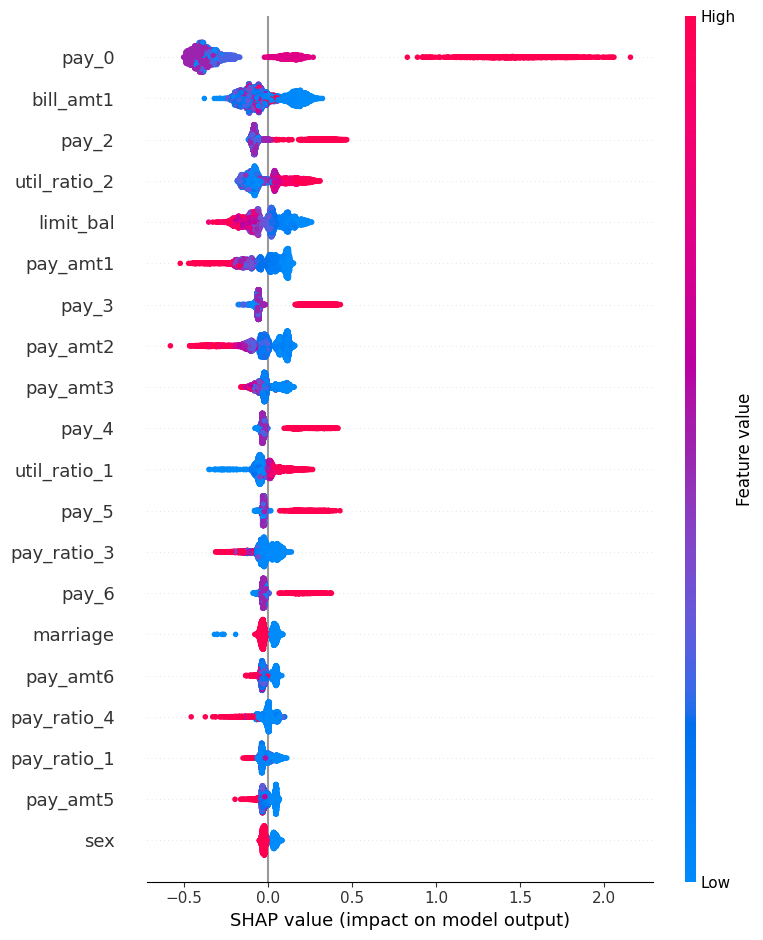

In [70]:
import shap
import matplotlib.pyplot as plt

# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(best_xgb)

# Compute SHAP values (use a subset if it's slow)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

Original Brier Score: 0.179182084262292
Calibrated Brier Score: 0.1344925029363198


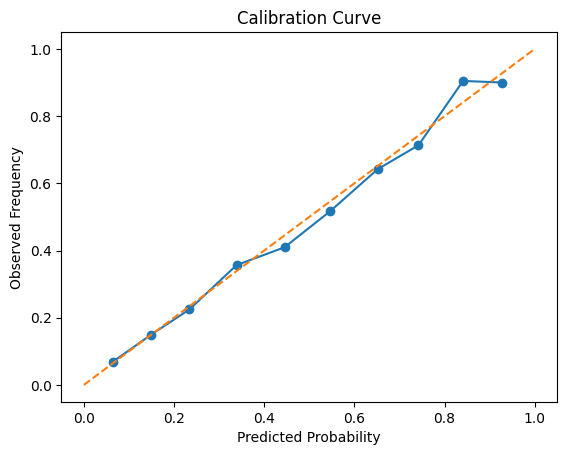

In [71]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# Wrap the best model
cal_model = CalibratedClassifierCV(best_xgb, method="isotonic", cv=3)
cal_model.fit(X_train, y_train)

# Predict calibrated probabilities
proba_cal = cal_model.predict_proba(X_test)[:,1]

print("Original Brier Score:", brier_score_loss(y_test, y_proba_final))
print("Calibrated Brier Score:", brier_score_loss(y_test, proba_cal))

# Plot calibration curve
prob_true, prob_pred = calibration_curve(y_test, proba_cal, n_bins=10)

plt.plot(prob_pred, prob_true, marker="o")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Calibration Curve")
plt.show()